# Author : Aakash Sawant
## GRIP August'21 , The SPARKS Foundation

## TASK 4 : Color Identification in Images

### Implement an image color detector which identifies all the colors in an image



In [7]:
#Importing Libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline


####        OPENCV READ IMAGE DEFAULT BGR Format


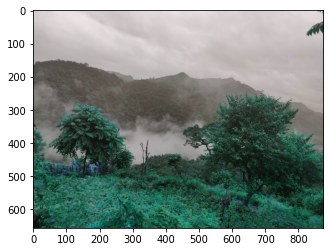

In [8]:
#Loading the image
img = cv2.imread('sample_image.jpeg')
plt.imshow(img)  

#### RGB Colors set for the image


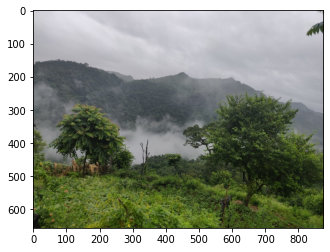

In [9]:
#Converting it to RGB colors
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#### Gray Image


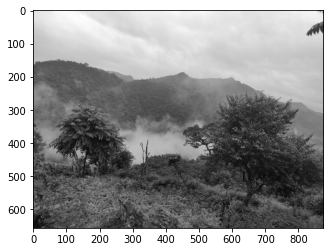

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

#### Resized image to 1200 x 600


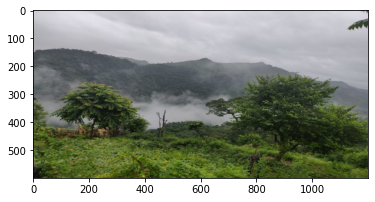

In [12]:
resized = cv2.resize(img, (1200, 600))
plt.imshow(resized)

### Color Identification

#### RGB to Hex Conversion


In [13]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

#### Read image in RGB color space


In [14]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

#### Get colors from an image


In [15]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([183.50514417, 183.91401685, 190.97220774]),
 array([81.1250657 , 87.97504994, 88.67435259]),
 array([32.39634617, 41.91680247, 20.83683563]),
 array([113.6582395 , 118.80655479, 116.07176971]),
 array([ 98.27924649, 114.87697476,  48.71783386]),
 array([151.89268968, 153.68861893, 155.8379156 ]),
 array([62.74159113, 77.02781484, 34.9790871 ]),
 array([207.30032265, 206.95894413, 214.48670003])]

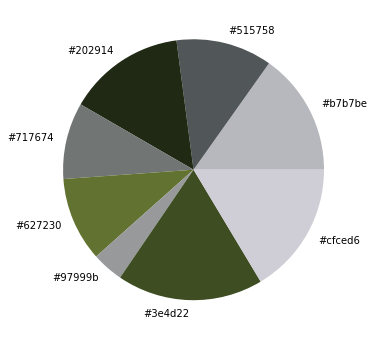

In [17]:
#Identified Colors

get_colors(get_image('sample_image.jpeg'), 8, True)


## Conclusion

### We discussed the methodology to extract colors from an image using KMeans algorithm 